In [951]:
import pickle
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd

In [952]:
TEST_RELATIONS = [(-3, 2),
 (2, -3, 2),
 (-2, -3, -3, 2),
 (3, 2, -1, -1, 3),
 (3, 1, -2, -3, -2, -2),
 (-3, -2, 1, -2, -1, -3, -3),
 (-1, -3, 2, 2, 2, 3, 2, 1),
 (2, -3, -3, 1, 3, 1, 2, 2, -3),
 (-1, -3, -1, -3, 1, -3, -3, 2, -1, -2),
 (3, 3, -2, 3, -2, 3, -2, -1, -1, -1, 2),
 (-3, -2, 1, 1, -3, 1, 1, 3, 1, 3, 2, 3),
 (-1, -1, -2, 3, 1, 1, -2, -2, 1, 1, 2, 2, 3),
 (1, -2, -3, -3, -3, 2, -3, -2, -1, 2, 1, -3, -1, -3)]

TEST_RELATIONS_SET = set(TEST_RELATIONS)

In [953]:
with open('/main/whitehead/data/datasets/L_100_data_prompts_test.pkl', 'rb') as f:
    test_data = pickle.load(f)
test_data = list(filter(lambda x: 1 not in x['relation_lengths'], test_data))
test_data = list(filter(lambda x: len(set(x['relations']).intersection(TEST_RELATIONS_SET)) == 2, test_data))
df_test = pd.DataFrame(test_data)
df_test['sorted_relations'] = df_test['relations'].apply(sorted)
df_test['sorted_relations'] = df_test['sorted_relations'].apply(lambda x: tuple(x))
df_test.sorted_relations.value_counts()

sorted_relations
((2, -3, 2), (3, 1, -2, -3, -2, -2))                                                 39
((-2, -3, -3, 2), (-1, -3, 2, 2, 2, 3, 2, 1))                                        34
((-1, -3, 2, 2, 2, 3, 2, 1), (-1, -1, -2, 3, 1, 1, -2, -2, 1, 1, 2, 2, 3))           34
((-3, 2), (3, 1, -2, -3, -2, -2))                                                    32
((-3, 2), (3, 2, -1, -1, 3))                                                         32
                                                                                     ..
((-1, -3, 2, 2, 2, 3, 2, 1), (2, -3, 2))                                             14
((-2, -3, -3, 2), (-1, -3, -1, -3, 1, -3, -3, 2, -1, -2))                            14
((3, 1, -2, -3, -2, -2), (3, 3, -2, 3, -2, 3, -2, -1, -1, -1, 2))                    13
((-1, -3, -1, -3, 1, -3, -3, 2, -1, -2), (3, 3, -2, 3, -2, 3, -2, -1, -1, -1, 2))    13
((1, -2, -3, -3, -3, 2, -3, -2, -1, 2, 1, -3, -1, -3), (3, 1, -2, -3, -2, -2))       12
Name: count, Le

In [954]:
with open('/main/whitehead/data/datasets/L_100_data_prompts_train.pkl', 'rb') as f:
    data = pickle.load(f)

In [955]:
# fix bug
data = list(filter(lambda x: 1 not in x['relation_lengths'], data))
data = list(filter(lambda x: len(set(x['relations']).intersection(TEST_RELATIONS_SET)) == 0, data))


In [956]:
def data_filter_prefix(prefix):
    return list(filter(lambda x: x['prefix'] == prefix, data))

In [957]:
print(*[(len(data_filter_prefix(prefix)), prefix) for prefix in ['nn','ny','yn']], sep='\n')

(50165, 'nn')
(53355, 'ny')
(53378, 'yn')


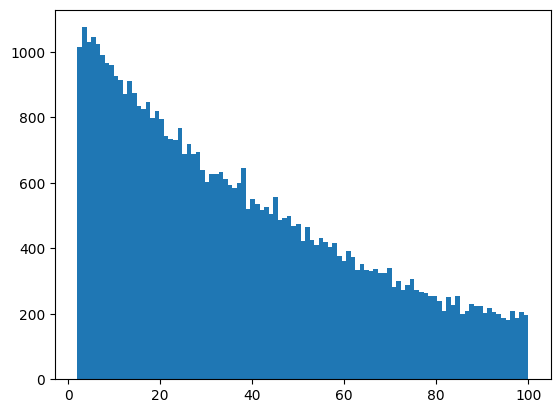

In [958]:
plt.hist(list(map(lambda x: x['word_length'], data_filter_prefix('nn'))), bins=99)
plt.show()

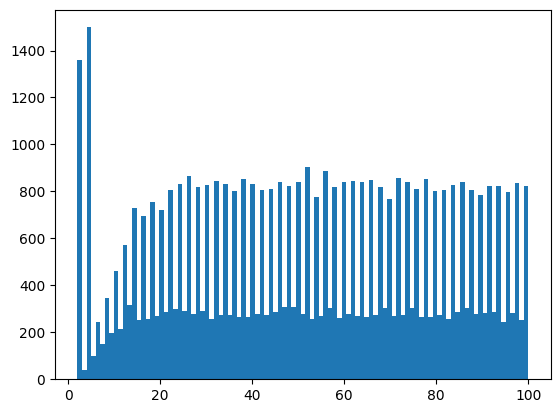

In [959]:
plt.hist(list(map(lambda x: x['word_length'], data_filter_prefix('yn'))), bins=99)
plt.show()

In [960]:
# def flat_relation_length_list(arr):
#     return np.array(arr).flatten().tolist()

# plt.hist(flat_relation_length_list(list(map(lambda x: x['relations'], data_filter_prefix('nn')))), bins=13)
# plt.show()
# data[0]['relation_lengths']

In [963]:
# plt.hist(flat_relation_length_list('ny'), bins=13)
# plt.show()
# data[0]['relation_lengths']

In [964]:
from tqdm import tqdm
for el in tqdm(data):
    el['sorted_relations'] = sorted(el['relations'])


  0%|                                                                                                              | 0/156898 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 156898/156898 [00:00<00:00, 492711.21it/s]


In [965]:
df = pd.DataFrame(data)
df['prefix_3'] = df['word'].apply(lambda x: x[:3])
df['relations'] = df['relations'].apply(lambda x: tuple(x))
df['sorted_relations'] = df['relations'].apply(sorted)
df['sorted_relations'] = df['sorted_relations'].apply(lambda x: tuple(x))

df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [966]:
prefix4test = df[:].groupby(['sorted_relations']).head(3)[['sorted_relations', 'prefix_3']]
prefix4test['test_1'] = 'without_prefixes'
df = df.merge(prefix4test, 'left', left_on=['sorted_relations', 'prefix_3'], right_on=['sorted_relations', 'prefix_3'])

In [967]:
(df.test_1=='without_prefixes').sum()

np.int64(5545)

In [968]:
prefix4test2 = df.sorted_relations.sample(frac=1).drop_duplicates().sample(25)
prefix4test3 = df[~df['sorted_relations'].isin(prefix4test2)].sorted_relations.sample(frac=1).drop_duplicates().sample(25)

df.loc[df['sorted_relations'].isin(prefix4test2) & (df.prefix == 'yn'), 'test_2'] = 'medium_info'
df.loc[df['sorted_relations'].isin(prefix4test3) & (df.prefix == 'ny'), 'test_2'] = 'medium_info'



In [969]:
prefix4test4 = df.sorted_relations.sample(frac=1).drop_duplicates().sample(25)
df.loc[df['sorted_relations'].isin(prefix4test4) & (df.prefix.isin(['yn', 'ny'])), 'test_2'] = 'low_info'

In [970]:
df[['test_1', 'test_2']].fillna('train').value_counts()

test_1            test_2     
train             train          144461
without_prefixes  train            5284
train             medium_info      3488
                  low_info         3469
without_prefixes  low_info          143
                  medium_info       118
Name: count, dtype: int64

In [971]:
'''
medium_info - соотношения, у которыз есть только два префикса (nn и один из положительных)
low_info - соотношения, у которыз есть только один префикс (nn) - то есть соотношения, которые просто появляются без позитивных примеров
without_prefixes - префиксы, которые не встречаются в датасете вообще

df_test - сотношения, которых вообще не было в трейне (по сути super_low_info, или without_all_prefixes)
'''

'\nmedium_info - соотношения, у которыз есть только два префикса (nn и один из положительных)\nlow_info - соотношения, у которыз есть только один префикс (nn) - то есть соотношения, которые просто появляются без позитивных примеров\nwithout_prefixes - префиксы, которые не встречаются в датасете вообще\n\ndf_test - сотношения, которых вообще не было в трейне (по сути super_low_info, или without_all_prefixes)\n'

In [972]:
dataset_train = df[df.test_1.isna()&df.test_2.isna()].to_dict(orient='records')
dataset_test_12 = df[df.test_1.notna() | df.test_2.notna()].to_dict(orient='records')
dataset_test_3 = df_test.to_dict(orient='records')

### Log dataset to wandb

In [411]:
from os import environ
import wandb

In [412]:
environ['WANDB_USERNAME']='pavel-tikhomirov'
environ['WANDB_DIR']=f'/main/whitehead/{environ["WANDB_USERNAME"]}-runs/'
environ['TOKENIZERS_PARALLELISM']='false'

In [413]:
run = wandb.init(entity='ml-in-algebraic-topology', project='whitehead', job_type='build-dataset')

wandb: Currently logged in as: pavel-tikhomirov (ml-in-algebraic-topology). Use `wandb login --relogin` to force relogin


In [414]:
fdim = 3

In [ ]:
data = wandb.Artifact(f'fdim-{fdim}-arbitrary-whitehead', type='dataset',
                      description=f'fdim={fdim}. Dataset for generation meta-model. Consists of pairs of relations from length 2 to 14. Contains 3 different tests',
                      metadata={
                              'fdim': fdim,
                              'N': len(dataset_train),
                              'max_length': df.word_length.max(),
                              'min_length': df.word_length.min(),
                              'min_relation_length': 2,
                              'max_relation_length': 14,
                          }
    )
with data.new_file('train.pkl', 'wb') as file:
        pickle.dump(dataset_train, file)
with data.new_file('test.pkl', 'wb') as file:
        pickle.dump(dataset_test_12 + dataset_test_3, file)
# with data.new_file('test3.pkl', 'wb') as file:
#         pickle.dump(dataset_test_3, file)
run.log_artifact(data)

<Artifact fdim-3-arbitrary-whitehead>

In [1066]:
dataset_joint = dataset_test_12 + dataset_test_3

In [1071]:
a = [el.get('test_2', None) for el in dataset_test_12]

In [1074]:
b = [el.get('test_2', None) for el in dataset_test_3]

In [1077]:
set(a)

{'low_info', 'medium_info', nan}

In [417]:
wandb.finish()

### try to inference model

In [9]:
import argparse
import json
import pickle
from copy import copy
from functools import partial
from os import environ
from pathlib import Path
from pickle import load

import torch
import wandb
from configs.utils import get_config
from ignite.contrib.handlers.tqdm_logger import ProgressBar
from ignite.engine import Engine, Events
from ignite.handlers import ModelCheckpoint
from ignite.metrics import Average, MetricsLambda, RunningAverage
from lming.optimization import build_optimizer, build_scheduler
from lming.utils import checkpoints_path, download_artifact, from_tensor
from torch.utils.data import DataLoader
from transformers import (AutoConfig, AutoModelForCausalLM,
                          PreTrainedTokenizerFast)
from utils import (back_transform, get_slice, inference_collate_fn,
                   load_external_module, max_gamma_metric, train_collate_fn,
                   transform_completion_ratio, transform_reduction_ratio)

from freegroup.tools import magnus_is_from_normal_closure

In [2]:
model_config_dir = '/main/whitehead/pavel-tikhomirov-runs/gpt-2-fdim-3:v0'

In [3]:
model_checkpoint_path = '/main/whitehead/pavel-tikhomirov-runs/wandb/latest-run/checkpoints/test/model_269_cr_fm=0.1734.pt'
state_dict = torch.load(model_checkpoint_path, weights_only=True)

In [4]:
tokenizer = PreTrainedTokenizerFast.from_pretrained(model_config_dir)

In [52]:
device = 'cuda:4'

In [6]:
model_config = AutoConfig.from_pretrained(model_config_dir)
model = AutoModelForCausalLM.from_config(model_config)#.to(device)
model = torch.compile(model)
model.load_state_dict(state_dict)
model.to(device)

OptimizedModule(
  (_orig_mod): GPT2LMHeadModel(
    (transformer): GPT2Model(
      (wte): Embedding(15, 768)
      (wpe): Embedding(1024, 768)
      (drop): Dropout(p=0.1, inplace=False)
      (h): ModuleList(
        (0-7): 8 x GPT2Block(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): GPT2SdpaAttention(
            (c_attn): Conv1D(nf=2304, nx=768)
            (c_proj): Conv1D(nf=768, nx=768)
            (attn_dropout): Dropout(p=0.1, inplace=False)
            (resid_dropout): Dropout(p=0.1, inplace=False)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): GPT2MLP(
            (c_fc): Conv1D(nf=512, nx=768)
            (c_proj): Conv1D(nf=768, nx=512)
            (act): NewGELUActivation()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
      )
      (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    )
    (lm_head): Linear(in_features=768, out_feat

In [7]:
# хочу написать обертку для тестов
# для генерации используеи бим серч, но возвращаем только одну последовательность 

In [12]:
from utils import inference_collate_fn

In [20]:
with open('/main/whitehead/pavel-tikhomirov-runs/fdim-3-arbitrary-whitehead:v1/test.pkl', 'rb') as f:
    dataset = pickle.load(f)

In [86]:
train_loader = DataLoader(
    dataset, batch_size=10,
    shuffle=True, num_workers=1, collate_fn=partial(inference_collate_fn, tokenizer=tokenizer, label='yy')
    )

In [72]:
from utils import construct_prompt_with_word_limit

In [85]:
def inference_collate_fn(batch_, tokenizer, prefix_length=3, label=None):
    closures = [el['relations'] for el in batch_]
    prefixes = [el['prefix'] for el in batch_] if label is None else [label for el in batch_] 
    info_tags = [el.get('test_2', 'no_info') for el in batch_]
    batch = [construct_prompt_with_word_limit(el, label=label, prefix_length=prefix_length) for el in batch_]
    batch = tokenizer(batch, padding=True, return_tensors='pt',
                      return_token_type_ids=False, padding_side='left')
    batch['input_ids'] = batch['input_ids'][:, :-1] # delete eof
    batch['attention_mask'] = batch['attention_mask'][:, :-1]
    batch['relations'] = closures
    batch['prefixes'] = prefixes
    batch['info_tags'] = info_tags
    return batch

In [107]:
a = next(iter(train_loader))

In [108]:
suppress_tokens = ["y", "n", ":", "<s>",
                   "<pad>", #after eos its okey
                   "[", "]", ","]
suppress_tokens = tokenizer.convert_tokens_to_ids(suppress_tokens)
generateion_confg = {
    "max_new_tokens": 100,
    "do_sample": False,
    "num_beams": 5,
    "num_return_sequences": 1,
    "suppress_tokens": suppress_tokens
}



In [109]:
from freegroup.tools import from_string
from utils import str_prefix2bool, batch_magnus_is_from_normal_closure
import numpy as np

In [ ]:
start_idx = a['input_ids'].shape[1]
with torch.no_grad():
    result = model.generate(input_ids=a['input_ids'].to(device),
                            attention_mask=a['attention_mask'].to(device),
                            **generateion_confg)
        
decodes = tokenizer.batch_decode(result[:, start_idx-3:], skip_special_tokens=True)

decodes = list(map(from_string, decodes))

###calculate middle results #TODO put into another separate function###=======================
#cycle_1
rels_1 = list(map(lambda x: x[0], a['relations']))
completion_ratio_1 = batch_magnus_is_from_normal_closure(decodes, rels_1, n_proc=2, timelimit=0.2)
#cycle_2
rels_2 = list(map(lambda x: x[1], a['relations']))
completion_ratio_2 = batch_magnus_is_from_normal_closure(decodes, rels_2, n_proc=2, timelimit=0.2)

preds = (np.array([completion_ratio_1, completion_ratio_2]).T)
gts = (np.array(list(map(str_prefix2bool, a['prefixes']))))


In [123]:
x = {'preds': preds, 'gts': gts}

In [126]:
from utils import calculate_nan_number

In [ ]:
(x['preds'] == np.nan).mean()

In [135]:
np.isnan(x['preds']).mean()

np.float64(0.45)

In [136]:
np.isnan((np.ones((3,3,3)) * np.nan)).mean()

np.float64(1.0)

In [127]:
calculate_nan_number(x)

np.float64(0.0)

In [125]:
completion_ratio_v2_1pos_match(x)

np.float64(0.0)

In [119]:
x

{'preds': array([[ 0.,  0.],
        [nan,  0.],
        [nan,  0.],
        [ 0., nan],
        [nan, nan],
        [ 0.,  0.],
        [nan,  0.],
        [ 0., nan],
        [nan,  0.],
        [nan,  0.]]),
 'gts': array([[ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True]])}

In [120]:
np.array([completion_ratio_1, completion_ratio_2])

array([[ 0., nan, nan,  0., nan,  0., nan,  0., nan, nan],
       [ 0.,  0.,  0., nan, nan,  0.,  0., nan,  0.,  0.]])

In [26]:
model.generate(input_ids=a.input_ids.to(device), attention_mask=a.attention_mask.to(device), max_new_tokens=100)

tensor([[8, 8, 8,  ..., 4, 4, 4],
        [8, 8, 8,  ..., 0, 0, 0],
        [8, 8, 8,  ..., 0, 0, 0],
        ...,
        [8, 8, 8,  ..., 0, 0, 0],
        [8, 8, 8,  ..., 0, 0, 0],
        [8, 8, 8,  ..., 4, 4, 4]], device='cuda:4')

In [ ]:
for el in dataset_test_12:
    el['word_start_index'] = sum(el['relation_lengths']) + len(el['prefix']) + 2 + 1

In [478]:
el = input_batch_inference[0]
idx = len(el['prompt'].rsplit(':', 1)[0]) + 1
word_length = len(el['prompt'].rsplit(':', 1)[1])

In [474]:
el['prompt']

'nn:3 -1,-1 2 1 1 -3 -3 -2 3 2 1 1 -2 1:2 3 3 2 2 -1 2 -1 -2 1 -3 -2 3 -1 2 -1 -3 1 2 -1 -3 2 2 -3 -1 -3 -2 3 1 2 -1 2 -3 -2 -2 -2 3 -2 -2 -3'

In [481]:
el.keys()

dict_keys(['word', 'word_str', 'prompt', 'word_length', 'relations', 'relation_lengths', 'prefix', 'prefix_3', 'sorted_relations', 'test_1', 'test_2'])

In [482]:
def to_string(word):
    return ' '.join(map(str, word))

In [490]:
def construct_prompt_with_word_limit(el, prefix=None, prefix_length=3):
    if prefix is None:
        prefix = el['prefix']
    return f"{prefix}:{to_string(el['relations'][0])},{to_string(el['relations'][1])}:{to_string(el['word'][:prefix_length])}"

In [487]:
construct_prompt_with_word_limit(el)

'yn:3 -1,-1 2 1 1 -3 -3 -2 3 2 1 1 -2 1:2 3 3'

In [488]:
el['prefix']

'nn'

In [1012]:
import random

In [1058]:
np.random.seed(0)
c = [1,2,3]
np.random.shuffle(c)
c

[3, 2, 1]

In [479]:
el['prompt'][-word_length:]

'2 3 3 2 2 -1 2 -1 -2 1 -3 -2 3 -1 2 -1 -3 1 2 -1 -3 2 2 -3 -1 -3 -2 3 1 2 -1 2 -3 -2 -2 -2 3 -2 -2 -3'

In [ ]:
# датасет не меняем. либо делать доп датасеты с новыми префиксами (дубликат по факту), либо менять в процессе инференса что-то. Лучше дубликат

In [1059]:
def inference_collate_fn(batch_, tokenizer, prefix_length=3):
    closures = [el['relations'] for el in batch_]
    prefixes = [el['prefix'] for el in batch_]
    info_tags = [el.get('test_2', 'no_info') for el in batch_]
    batch = [construct_prompt_with_word_limit(el, prefix_length=prefix_length) for el in batch_]
    batch = tokenizer(batch, padding=True, return_tensors='pt',
                      return_token_type_ids=False, padding_side='left')
    batch['input_ids'] = batch['input_ids'][:, :-1] # delete eof
    batch['attention_mask'] = batch['attention_mask'][:, :-1]
    batch['relations'] = closures
    batch['prefixes'] = prefixes
    batch['info_tags'] = info_tags

    return batch

In [ ]:
import pickle
from copy import deepcopy

dataset_joint_yy = deepcopy(dataset_test_12 + dataset_test_3)
for el in dataset_joint_yy:
    el['prefix'] = 'yy'
    el.pop('prompt', None)
    el.pop('prefix_3', None)

In [784]:
a = inference_collate_fn(input_batch_inference, tokenizer, 'prompt')
a.keys()

dict_keys(['input_ids', 'attention_mask', 'relations', 'prefixes'])

In [785]:
from lming.utils import checkpoints_path, download_artifact, from_tensor
import multiprocessing as mp

def magnus_is_from_normal_closure_tmp(word, relator, T=None):
    try:
        return magnus_is_from_normal_closure(word, relator, T)  
    except TypeError:
        return None


def batch_magnus_is_from_normal_closure(words, closures, n_proc=None):
    if n_proc is not None and n_proc > 1:
        with mp.Pool(n_proc) as pool:
            results = pool.starmap(magnus_is_from_normal_closure_tmp, list(zip(words, closures)))
    else:
        results = [magnus_is_from_normal_closure_tmp(word, closure) for word, closure in zip(words, closures)]
    return results

In [3]:
from freegroup.tools import from_string
from_string(':')

ParseError: expected: 'multiplication' at 0:0

In [ ]:
suppress_tokens = ["y", "n", ":", "<s>",
                   "<pad>", #after eos its okey
                   "[", "]", ","]
suppress_tokens = tokenizer.convert_tokens_to_ids(suppress_tokens)
generateion_confg = {
    "max_new_tokens": 100,
    "do_sample": False,
    "num_beams": 5,
    "num_return_sequences": 1,
    "suppress_tokens": suppress_tokens
}

In [927]:
prefix_length = 0
test_loader_prefix_3 = DataLoader(
    list(filter(lambda x: x['word_length'] >= prefix_length, joint_dataset_yy)),
    batch_size=10, shuffle=False,
    collate_fn=partial(inference_collate_fn, tokenizer=tokenizer, prefix_length=prefix_length)
    )

In [928]:
a = next(iter(test_loader_prefix_3))

In [930]:
res = model.generate(input_ids=a['input_ids'].to(device),
                     attention_mask=a['attention_mask'].to(device),
                     **generateion_confg)

In [931]:
a['prefixes']

['yy', 'yy', 'yy', 'yy', 'yy', 'yy', 'yy', 'yy', 'yy', 'yy']

In [932]:
a.keys()

dict_keys(['input_ids', 'attention_mask', 'relations', 'prefixes'])

In [888]:
# def choose_random_word_from_freegroup_time_limit(*args, **kwargs):
#     TIMELIMIT = 0.3
#     N_ATTEMPTS = 1
#     for _ in range(N_ATTEMPTS):
#         try:
#             res =  func_timeout.func_timeout(
#                     TIMELIMIT, choose_random_word_from_freegroup, args=args
#                     )
#             # print('func res', res)
#             return res
#         except:
#             return None, None

In [933]:
start_idx = a['input_ids'].shape[1]

In [934]:
decoded_words = list(map(from_string, tokenizer.batch_decode(res[:, start_idx-prefix_length:], skip_special_tokens=True)))

In [936]:
a['relations']

[((3, -1), (-1, 2, 1, 1, -3, -3, -2, 3, 2, 1, 1, -2, 1)),
 ((1, -2), (2, 2, -3, -1, -2)),
 ((-1, 2, 1, 1), (-3, 2, -1, -2, 3, -1, 2, 1, 1, 3, -2, 1, -3, 2)),
 ((1, -2), (-1, 2, 1, 1)),
 ((3, 2, 3, -2, -1, 2, 1), (-1, 3, -1, -1, -3, -1, -1, 3, 2, -3, -3)),
 ((2, 2, -3, -1, -2), (-3, 1, 1, -2, 1, -2, -2, 3, 3, 2, 3, 1, 3)),
 ((3, 2, 3, -2, -1, 2, 1), (3, -1)),
 ((-2, 3), (1, -2)),
 ((-3, -3, -3, 2, 3, 1, -3, -3, 2), (3, -1)),
 ((3, 2, 3, -2, -1, 2, 1), (1, -2, -1))]

In [907]:
#cycle_1
rels_1 = list(map(lambda x: x[0], a['relations']))
completion_ratio_1 = batch_magnus_is_from_normal_closure(decoded_words, rels_1)
#cycle_2
rels_2 = list(map(lambda x: x[1], a['relations']))
completion_ratio_2 = batch_magnus_is_from_normal_closure(decoded_words, rels_2)


In [908]:
# выход батча это res, соотношения и префиксы.
# будет два инференсера и два даталоадера, но с 

In [909]:
def str_prefix2bool(prefix):
    res = []
    for s in prefix:
        if s == 'y':
            res.append(True)
        else:
            res.append(False)
    return res

In [910]:
preds = np.array([completion_ratio_1, completion_ratio_2]).T
gts = np.array(list(map(str_prefix2bool,a['prefixes'])))

In [911]:
(preds==gts).min(axis=1).mean() #-full match with prefix


np.float64(0.0)

In [1060]:
class MyCustom:
    def __init_():
        pass

In [1061]:
a = MyCustom

In [926]:
((preds[:, 1] == gts[:, 1])[np.where(gts[:, 1])] | (preds[:, 0] == gts[:, 0])[np.where(gts[:, 0])]).mean() # -y-match хотя бы один

np.float64(0.9)

In [916]:
(preds[np.where(gts)] == True) #- y-match #здесь можно умножать на количество gts

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False, False,  True, False, False,  True,
       False,  True])

In [915]:
preds

array([[False, True],
       [False, True],
       [False, True],
       [False, True],
       [False, True],
       [False, True],
       [False, False],
       [True, False],
       [False, True],
       [None, True]], dtype=object)

In [870]:
(preds[np.where(~gts)] == False).mean() #- n-match

np.float64(1.0)

In [632]:
joint_dataset = dataset_test_12 + dataset_test_3

In [878]:
len(joint_dataset)

14106

In [882]:
joint_dataset_yy = copy(joint_dataset)
for el in joint_dataset_yy:
    el['prefix'] = 'yy'
    del el['prompt']

In [883]:
joint_dataset_yy[]

[{'word': (2,
   3,
   3,
   2,
   2,
   -1,
   2,
   -1,
   -2,
   1,
   -3,
   -2,
   3,
   -1,
   2,
   -1,
   -3,
   1,
   2,
   -1,
   -3,
   2,
   2,
   -3,
   -1,
   -3,
   -2,
   3,
   1,
   2,
   -1,
   2,
   -3,
   -2,
   -2,
   -2,
   3,
   -2,
   -2,
   -3),
  'word_str': '2 3 3 2 2 -1 2 -1 -2 1 -3 -2 3 -1 2 -1 -3 1 2 -1 -3 2 2 -3 -1 -3 -2 3 1 2 -1 2 -3 -2 -2 -2 3 -2 -2 -3',
  'word_length': 40,
  'relations': ((3, -1), (-1, 2, 1, 1, -3, -3, -2, 3, 2, 1, 1, -2, 1)),
  'relation_lengths': [2, 13],
  'prefix': 'yy',
  'prefix_3': (2, 3, 3),
  'sorted_relations': ((-1, 2, 1, 1, -3, -3, -2, 3, 2, 1, 1, -2, 1), (3, -1)),
  'test_1': 'without_prefixes',
  'test_2': nan},
 {'word': (3,
   1,
   -3,
   2,
   3,
   1,
   -2,
   -2,
   -2,
   2,
   1,
   3,
   2,
   -1,
   -3,
   -2,
   3,
   2,
   3,
   2,
   2,
   -3,
   -1,
   -2,
   -3,
   2,
   -3,
   -1,
   -2,
   -1,
   -3,
   2,
   -3,
   -1,
   -2,
   2),
  'word_str': '3 1 -3 2 3 1 -2 -2 -2 2 1 3 2 -1 -3 -2 3 2 3 2 2 -3 -1 

In [881]:
joint_dataset_yy[0]

{'word': (2,
  3,
  3,
  2,
  2,
  -1,
  2,
  -1,
  -2,
  1,
  -3,
  -2,
  3,
  -1,
  2,
  -1,
  -3,
  1,
  2,
  -1,
  -3,
  2,
  2,
  -3,
  -1,
  -3,
  -2,
  3,
  1,
  2,
  -1,
  2,
  -3,
  -2,
  -2,
  -2,
  3,
  -2,
  -2,
  -3),
 'word_str': '2 3 3 2 2 -1 2 -1 -2 1 -3 -2 3 -1 2 -1 -3 1 2 -1 -3 2 2 -3 -1 -3 -2 3 1 2 -1 2 -3 -2 -2 -2 3 -2 -2 -3',
 'prompt': 'nn:3 -1,-1 2 1 1 -3 -3 -2 3 2 1 1 -2 1:2 3 3 2 2 -1 2 -1 -2 1 -3 -2 3 -1 2 -1 -3 1 2 -1 -3 2 2 -3 -1 -3 -2 3 1 2 -1 2 -3 -2 -2 -2 3 -2 -2 -3',
 'word_length': 40,
 'relations': ((3, -1), (-1, 2, 1, 1, -3, -3, -2, 3, 2, 1, 1, -2, 1)),
 'relation_lengths': [2, 13],
 'prefix': 'yy',
 'prefix_3': (2, 3, 3),
 'sorted_relations': ((-1, 2, 1, 1, -3, -3, -2, 3, 2, 1, 1, -2, 1), (3, -1)),
 'test_1': 'without_prefixes',
 'test_2': nan}

In [ ]:
dataset_test_3_enriched = dataset_test_3 + [construct_prompt_with_word_limit(el, prefix='yy') for el in dataset_test_3]
# construct_prompt_with_word_limit(el) происходит в коллейте

In [621]:
len(list(filter(lambda x: x['prefix']=='nn', dataset_test_3)))

570

In [ ]:
res # теперь надо с соотношениями это подружить (в зависимости от префикса). 
# Во-первых для всех тегов тестируем yy (здесь смотрим как влияет наличие префикса, наличие полной инфморации).
# Во-вторых для тегов с "инфо" используем родные префиксы
# Соответственно в батче должна быть информация о соотношениях и информация о префиксе
# глобально оцениваем влияние длины префикса. Заранее убираем все слова меньше prefix_length, чтобы об этом не думать уже
# можно объединить всё в одно, а потом по тегам также разделить

tensor([[ 8,  8,  8,  6, 13, 13, 14,  5,  0, 11,  0,  4,  3,  3,  2,  2,  1,  5,
          4,  3,  3,  1,  3, 14,  4,  5,  5,  1,  2,  1,  2,  1,  2,  3,  3,  3,
          3,  1,  3,  4,  4,  0,  0,  1,  0,  1,  0,  0,  4,  0,  5,  4,  4,  0,
          1,  3,  2,  1,  2,  0,  0,  1,  1,  1,  1,  3,  1,  1,  3,  1,  0,  1,
          0,  0,  1,  1,  3,  1,  0,  0,  0,  1,  0,  1,  1,  0,  5,  4,  0,  0,
          1,  1,  1,  0,  5,  4,  4,  4,  4,  3,  1,  3,  4,  0,  0,  0,  5,  4,
          4,  5,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,  4,  5,  4,  3,  7,  8,
          8],
        [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  6, 13, 12, 14,  3,  1, 11,
          4,  4,  2,  0,  1, 14,  5,  3,  2,  0,  1,  4,  4,  2,  0,  1,  4,  4,
          2,  0,  1,  4,  4,  3,  5,  1,  1,  4,  3,  5,  1,  1,  4,  3,  5,  1,
          1,  4,  3,  5,  1,  1,  4,  3,  5,  1,  1,  4,  3,  5,  1,  1,  4,  4,
          2,  0,  1,  4,  3,  5,  1,  1,  4,  4,  2,  0,  1,  4,  3,  5,  1,  1,
          4,  

In [548]:
tokenizer.decode(res[0][-100:].cpu())

'2 1 -3 -3 -2 -3 -3 1 -3 1 -3 1 -2 1 2 -1 2 -1 -2 -1 3 2 1 -3 -2 1 2 -1 -2 -1 3 2 -1 3 2 1 -2 -2 -2 -1 3 -1 -2 -2 -2 -1 3 2 1 2 1 2 1 2 1 2 1 2 -1 -2 -1 2 -1 -2 -1 3 -1 -2 -2 -1 -2 -2 -1 -2 -1 -2 -1 -2 -2 -2 -1 3 -1 3 -1 -2 -1 3 -1 3 -1 3 -1 3 -1 3 -1 -2 </s> <pad>'

In [549]:
tokenizer(tokenizer.decode(res[0].cpu()))['input_ids'][1:-1] == res[0].cpu().tolist()

True

In [556]:
tokenizer.batch_decode(res[:, -100:].cpu())

['2 1 -3 -2 -2 -2 1 -3 -3 -3 -3 -2 3 3 2 2 -1 -2 -3 -3 -3 -2 -3 -2 -3 2 -1 3 2 2 -1 -2 -1 3 2 3 3 2 -1 -2 -2 -3 -2 -3 -1 -2 -3 -1 -2 -3 -2 1 -3 -1 -2 3 2 2 3 2 3 2 1 3 2 3 2 2 2 -1 -2 -2 -3 -3 -1 -2 3 2 2 3 2 3 2 3 3 2 3 3 2 2 3 3 -1 -2 </s> <pad> <pad> <pad> <pad> <pad>',
 '-1 -2 -2 2 2 -3 -1 -2 2 1 3 -2 -2 2 1 3 -2 -2 2 2 -3 -1 -2 2 1 3 -2 -2 2 1 3 -2 -2 2 1 3 -2 -2 2 2 -3 -1 -2 2 2 -3 -1 -2 2 1 3 -2 -2 2 1 3 -1 -2 2 1 3 -2 -2 2 1 3 -1 -2 -2 2 1 3 -2 2 -3 -1 -2 2 1 3 -2 2 1 3 -1 -2 2 1 3 -1 -2 2 1 3 -1 -2 </s> <pad> <pad> <pad>',
 '2 2 2 2 1 1 -3 -1 -2 -2 1 -3 -1 -1 2 2 2 1 1 -3 -1 -2 -2 -2 -2 -2 1 1 -3 -1 -2 -2 -2 1 1 -3 2 -1 -1 -2 -2 -1 -2 1 1 2 1 3 2 2 1 -2 -2 1 2 2 -1 3 -1 -1 2 -1 -2 -2 -2 -2 -1 -1 -1 -2 -2 -2 -2 -2 -2 1 2 2 2 1 -2 -2 -1 3 -1 -1 -1 3 </s> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>',
 '-1 2 1 1 -1 -1 -2 1 -1 2 1 1 -1 2 1 1 -1 -1 -2 1 -1 -1 -2 1 -1 -1 -2 1 -1 -1 -2 1 -1 2 1 1 -1 -1 -2 1 -1 2 1 1 -1 -1 -2 1 -1 -1 -2 1 -1 -1 -2 1 -1 2 1 -1 -2 1

In [524]:
from_tensor(res.cpu(), tokenizer=tokenizer)[0]

[2,
 3,
 3,
 -2,
 -3,
 -3,
 -2,
 3,
 2,
 1,
 -3,
 -3,
 -2,
 3,
 2,
 2,
 1,
 -2,
 1,
 -3,
 -2,
 -3,
 -3,
 -2,
 3,
 3,
 2,
 -1,
 2,
 -1,
 -2,
 -2,
 1,
 -3,
 -2,
 -3,
 -2,
 -3,
 -1,
 -2,
 -3,
 -2,
 -3,
 2,
 -1,
 -2,
 3,
 2,
 1,
 -2,
 -3,
 2,
 3,
 2,
 3,
 3,
 2,
 -1,
 -2,
 -3,
 -1,
 -2,
 -3,
 -1,
 -2,
 -2,
 1,
 -3,
 -2,
 -3,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 3,
 -1,
 -2,
 -1,
 -2]

In [512]:
res.shape

torch.Size([5, 127])

In [437]:
dataset_test_12[0]

{'word': (2,
  3,
  3,
  2,
  2,
  -1,
  2,
  -1,
  -2,
  1,
  -3,
  -2,
  3,
  -1,
  2,
  -1,
  -3,
  1,
  2,
  -1,
  -3,
  2,
  2,
  -3,
  -1,
  -3,
  -2,
  3,
  1,
  2,
  -1,
  2,
  -3,
  -2,
  -2,
  -2,
  3,
  -2,
  -2,
  -3),
 'word_str': '2 3 3 2 2 -1 2 -1 -2 1 -3 -2 3 -1 2 -1 -3 1 2 -1 -3 2 2 -3 -1 -3 -2 3 1 2 -1 2 -3 -2 -2 -2 3 -2 -2 -3',
 'prompt': 'nn:3 -1,-1 2 1 1 -3 -3 -2 3 2 1 1 -2 1:2 3 3 2 2 -1 2 -1 -2 1 -3 -2 3 -1 2 -1 -3 1 2 -1 -3 2 2 -3 -1 -3 -2 3 1 2 -1 2 -3 -2 -2 -2 3 -2 -2 -3',
 'word_length': 40,
 'relations': ((3, -1), (-1, 2, 1, 1, -3, -3, -2, 3, 2, 1, 1, -2, 1)),
 'relation_lengths': [2, 13],
 'prefix': 'nn',
 'prefix_3': (2, 3, 3),
 'sorted_relations': ((-1, 2, 1, 1, -3, -3, -2, 3, 2, 1, 1, -2, 1), (3, -1)),
 'test_1': 'without_prefixes',
 'test_2': nan}

In [16]:
tokenizer = PreTrainedTokenizerFast.from_pretrained(model_config_dir)

In [435]:
model.generate()

tensor([[ 6, 13, 13, 14,  2,  3,  4,  2,  0, 11,  2,  3,  5,  1,  5,  4,  2,  3,
         14,  3]])

In [19]:
train_collate_fn([data[1], data[0]], tokenizer, key='prompt')['input_ids']

tensor([[ 6, 13, 12, 14,  5,  3,  5,  5, 11,  5,  3,  1,  2,  1,  1, 14,  4,  4,
          0,  2,  4,  4,  5,  1,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          8,  8,  8,  8],
        [ 6, 13, 13, 14,  3,  1,  0, 11,  5,  0,  1,  3,  2,  0,  0,  5,  0,  5,
         14,  5,  0,  0,  5,  4,  4,  2,  2,  4,  5,  4,  5,  3,  4,  4,  3,  1,
          0,  5,  4,  0,  2,  1,  1,  0,  0,  0,  2,  3,  5,  4,  3,  3,  4,  2,
          1,  2,  1,  7]])

In [18]:
train_collate_fn([data[1], data[0]], tokenizer, key='prompt')['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [4]:
decodes = ['1 -2 -2 3 -2 -3 2 1 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 -2 -1 3 3 3 3 2 -3 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -2 3 -1 -1 -3 -3 2 -1 3 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 1 3 -1 2 -3 2 3 1 1 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 3 2 -3 2 1 2 1 3 1 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 3 -1 -1 -3 2 -3 1 -3 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 1 -2 -2 -1 2 -3 2 3 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 3 3 2 1 2 3 3 3 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 2 3 3 -1 -2 -3 -1 -3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-1 -2 -3 2 1 -2 -3 -1 -3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-1 -2 -2 3 -2 3 2 1 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 3 2 1 -2 1 -2 -3 2 2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '2 2 3 1 3 -2 -3 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 2 2 1 -2 -2 -1 -3 -2 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -2 1 -2 -2 -1 -2 3 -2 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -1 -2 -3 1 -3 2 -3 -3 2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-3 -1 2 2 3 -1 -3 -2 1 1 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 -1 2 -3 -1 -2 2 2 3 3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-3 -1 -3 -2 -2 -2 -3 -1 -1 3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '3 3 -1 -1 -1 -3 -1 -1 -3 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 1 -3 -3 -2 -2 -3 1 3 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 3 -2 1 3 -2 1 1 -3 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 3 3 3 -1 -2 3 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 -3 -3 1 -3 1 3 1 3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-2 -3 2 2 -3 -3 2 2 3 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 1 2 2 3 3 -1 -1 -3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '2 2 -3 2 2 2 2 -1 -2 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -1 -2 -2 -2 1 2 -1 -2 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 3 -2 1 -2 -1 2 3 -1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -1 3 3 1 -3 2 3 1 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 3 2 1 1 3 -2 1 -3 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 -2 3 -2 -1 -2 -2 -3 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 1 -2 -3 -2 1 -3 2 3 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -2 -2 -3 1 2 2 3 2 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 -2 1 -3 -3 -2 3 2 -1 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -2 -2 -3 2 2 3 1 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 3 -2 -2 -1 -3 -2 3 -1 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -3 2 1 1 1 -3 -1 -3 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 3 -1 -2 -2 1 2 -3 -3 1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-2 -2 -2 -3 2 2 3 3 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-1 -3 2 2 -3 -3 1 1 3 2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-1 -3 -1 -2 1 1 3 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 3 3 -1 -3 -2 -1 -2 1 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 -1 -2 -2 -2 -1 3 -1 2 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 1 1 3 3 -1 -3 1 -2 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -2 -1 -1 -1 -1 3 -2 -3 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -2 -1 -3 -2 3 -1 -3 -1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 -2 -3 2 -1 -3 -3 -1 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 3 -2 -1 2 2 3 3 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '1 3 -2 -2 -1 -3 2 3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '2 1 -3 1 3 -1 -1 -2 -2 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -1 3 2 -1 -3 2 -1 -1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -1 2 -1 -2 3 -1 3 2 2 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 2 1 -3 , -2 3 -2 3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '2 3 3 -1 3 -2 -2 -1 -2 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-3 -2 3 3 1 -3 -1 -3 2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 3 -1 2 1 -2 -3 -3 2 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 2 -1 2 -3 -1 2 -3 1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 2 -3 -3 2 -3 -1 2 2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -1 -2 -2 -2 -3 2 3 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '3 2 -3 -1 -1 -1 -3 2 -1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 2 -1 -3 -1 -1 -1 -3 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -3 -1 -3 -1 -3 -3 2 -3 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -1 3 1 -2 -1 3 1 3 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -3 1 3 -1 2 2 2 1 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -3 1 1 3 -1 2 3 3 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 1 -3 1 1 -3 1 -2 1 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 1 -2 3 2 2 -1 -2 -3 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 -1 -2 3 -1 2 1 -3 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 1 2 -3 -1 -2 3 2 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -2 -2 -2 -2 -2 -3 -1 -3 2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '1 3 2 3 -2 -3 1 2 -3 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -2 -1 -1 2 2 1 -2 -1 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -2 -1 -2 -2 -2 1 -2 3 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 3 1 3 -1 -1 3 -2 3 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 1 -3 2 3 3 -2 3 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 3 -1 -1 3 3 -1 -1 -3 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -3 -3 -3 1 3 -1 -2 1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1', '-2 -2 -2 3 3 1 3 -2 3 1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '3 -1 -2 -3 -1 -2 3 3 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 -1 -3 -3 , 1 -2 1 -2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 2 -3 -1 2 -1 -3 2 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -3 , 1 -2 -2 -1 2 2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -3 -3 -1 -1 2 1 1 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 2 2 3 -1 2 -3 -1 -1 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -1 -3 1 -2 -3 1 -2 3 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -2 3 -2 3 2 -3 -3 -2 3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-3 -2 3 3 -2 -1 2 1 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -1 -3 1 -3 1 1 3 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 2 -1 2 -1 -3 -1 -2 -2 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 3 3 2 -3 2 1 1 -2 1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 -3 -1 -1 -1 3 3 1 3 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 -3 -3 -2 -2 -2 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -2 -2 -3 2 1 1 -2 -3 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 -3 -3 1 -2 -1 3 -2 3 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 -3 1 2 1 -3 2 -1 -2 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -3 -2 -1 -3 1 3 3 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 3 -1 3 -1 3 -1 -3 1 1 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 2 1 -2 -2 3 1 -3 -3 2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -3 -1 -3 -1 3 2 1 -2 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -1 -1 3 1 -2 -1 -2 -3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '2 -1 -1 -3 -3 1 -3 -2 3 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -3 2 2 2 3 3 2 -3 -1 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '1 -3 -3 -2 -1 2 3 -1 -1 -2 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 2 -1 3 1 3 1 -3 -3 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -1 3 2 2 2 1 -3 -3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '2 2 -1 -2 -2 -2 -1 -2 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-2 -2 -2 -3 -1 -3 -1 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 2 2 -1 2 -3 -2 3 2 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 -1 3 3 -2 3 3 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 -2 -2 -3 -2 -1 -2 1 1 2 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -2 1 3 1 -2 -3 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -3 -3 -3 1 -3 -1 -3 1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 2 1 -2 3 2 2 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 -1 -3 2 1 -2 -3 2 2 3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '2 2 2 -1 -3 2 3 3 -1 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -1 3 2 -1 -2 3 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 3 2 1 -3 -2 1 -2 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -3 2 -1 3 3 2 3 -2 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 -2 -2 2 2 1 2 1 3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-1 -2 -1 2 2 1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-3 -3 , 1 -2 1 -2 1 -2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -3 1 1 2 1 -2 3 1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 -1 -3 -2 1 -3 -1 -1 -3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-3 -1 -1 -2 2 2 -3 -1 -2 2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-2 1 1 1 2 -3 -1 -3 1 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 -1 2 -3 -2 3 3 -2 -1 -3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '2 2 2 3 -1 -2 -3 -2 3 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -3 1 -2 -3 -2 -3 2 3 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -1 -3 1 1 -3 1 1 2 3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 1 1 2 3 1 2 -1 -2 1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 1 2 -1 -1 -1 -2 3 3 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -2 1 3 3 -2 -2 2 1 -3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-3 -2 -3 -3 2 -3 -3 -3 2 3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 -2 1 2 2 1 1 1 -2 1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '3 3 -2 3 3 -2 -2 -3 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '2 2 -3 2 1 2 3 1 -2 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -1 -1 3 -1 3 -1 2 3 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 3 -1 3 -1 2 3 -1 -2 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 1 -2 -1 3 1 1 -3 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -2 -3 -1 -1 -2 1 1 -2 3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '1 2 -1 -1 -3 2 -3 -1 2 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -2 -2 -2 3 2 2 2 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 3 1 3 -1 3 2 -1 -3 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 1 2 1 -3 -2 -2 3 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '3 2 2 -1 -3 -3 -2 -1 -1 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -3 -3 1 1 -3 -1 3 3 1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 -1 3 2 3 -1 -3 -2 -3 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -1 -3 2 3 -1 -1 2 3 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 1 -2 -3 -2 1 1 1 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 3 -2 3 2 -3 2 3 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1', '3 2 1 3 1 3 -2 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 2 -1 -1 2 -1 -3 -1 -1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 2 -1 3 -2 1 2 -3 -2 -1 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-2 -3 -2 -1 -2 -2 1 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -3 -1 3 -1 2 -1 -3 -2 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 -2 -1 2 3 -2 2 1 3 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-1 -1 -3 -2 -2 -1 1 2 3 1 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -1 -3 -2 3 -1 -2 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 -2 3 3 -1 -3 -3 1 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 2 3 -2 -3 1 1 2 1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 -2 -2 -3 -3 1 3 -1 -1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 2 1 -3 -2 3 3 1 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 -2 -1 -3 -1 1 -2 3 1 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 -1 2 1 1 2 -1 -2 -1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -2 -2 -2 3 2 2 2 1 -3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-1 -2 1 -3 -3 -3 2 3 3 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -1 -2 3 3 1 -2 -1 -3 1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 -2 -1 -3 2 3 -2 1 3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-1 3 1 -3 -2 -3 2 3 2 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -2 -1 -1 -1 -2 -2 -3 1 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 2 -3 2 -1 -2 3 -1 -3 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -2 -2 -1 -2 1 1 3 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -1 2 2 1 2 1 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -2 -3 -2 1 3 3 -2 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -2 -2 -3 -1 -1 3 1 3 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 2 -1 -2 -1 3 2 1 2 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -3 -3 -2 -2 3 3 2 3 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -1 3 2 3 1 -3 -3 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 -2 1 3 3 3 3 2 2 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 -3 -1 -3 1 3 -2 -2 -1 3 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 1 2 1 -2 3 1 -2 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -1 3 2 1 -2 -1 3 -1 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -1 2 -1 -1 3 3 -2 -3 2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '2 -1 -3 -3 , 1 -2 -2 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -1 -1 2 3 -1 2 3 2 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 2 -3 -1 -3 2 -3 -1 2 2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-1 -3 2 -3 -3 1 3 -2 3 3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 1 3 2 -3 2 -3 -3 -2 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 3 2 2 -3 -3 -3 2 3 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 2 1 2 3 -3 1 1 -2 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 -2 -3 2 -1 -3 -3 2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 3 1 3 -1 -1 3 3 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 1 -3 2 3 1 1 3 -1 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 -2 3 1 -3 1 3 -2 -1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 -2 3 -1 3 -2 -1 -2 -3 1 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 1 -3 1 2 3 3 1 -2 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 -3 -1 -2 1 2 -3 1 3 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 2 -1 -3 -3 -1 -1 2 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 1 2 2 -3 1 3 2 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '2 -3 2 -1 -3 2 2 -1 -1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 2 -3 -3 1 -2 3 -2 1 1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-3 2 2 -3 -3 1 -3 -3 2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 1 2 -3 -2 -1 3 2 -3 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 -1 -3 -3 2 -1 -3 -3 2 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -3 -1 -2 -3 1 3 -1 3 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -2 -2 -1 -1 -1 2 3 3 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -1 2 2 1 2 1 2 3 1 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -3 -3 -2 -1 -1 -1 3 1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 -2 3 3 3 1 1 2 -1 2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-3 2 1 1 2 1 1 -3 -3 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 1 1 -3 -2 -1 -1 2 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 -3 -3 1 3 1 2 3 -1 2 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 2 2 2 1 2 1 3 -2 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 2 2 -3 -2 -1 -2 -2 -1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 1 1 2 3 -2 1 -3 2 1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-3 2 1 -3 , -2 3 2 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -3 1 -3 -2 -2 -1 -1 -3 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 2 1 -3 , -2 3 -2 3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '3 2 3 -2 -1 -2 3 -2 3 3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '1 2 1 3 -2 -2 1 -3 2 -3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-3 1 2 3 -1 2 1 1 -3 1 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 1 -3 1 -3 -2 3 -1 -3 1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 3 2 1 3 3 -1 -2 -2 -3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-1 3 3 2 -1 -3 1 -3 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 2 3 1 1 2 -1 3 2 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 3 3 3 2 3 -1 -1 3 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -1 -1 2 1 -3 -1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '1 3 3 3 2 -3 1 -3 -3 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -1 2 -3 1 1 -3 -2 3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 -1 -2 1 3 3 -1 2 3 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 3 2 2 3 3 2 2 2 -3 -3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-2 -1 1 -2 1 -2 -1 2 -1 1 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 1 3 -2 1 2 1 3 -1 2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-2 3 1 -3 -3 2 -1 -1 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 1 -3 -3 1 -3 1 2 1 1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 -3 2 2 -1 -1 3 1 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 2 -1 -3 -3 1 1 -2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 -1 -3 2 1 -2 3 -2 3 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 -2 3 -2 3 1 3 2 -1 3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '1 -3 -2 3 -1 3 -2 1 1 -2 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -2 3 -2 3 -1 -1 2 2 1 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-1 -2 -2 -2 -3 1 -2 -3 -1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -1 -3 1 2 1 2 1 3 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-1 -2 -3 1 3 -1 3 2 3 2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '3 3 -1 -2 -2 3 1 -2 3 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '3 3 -1 3 3 -1 -3 1 -3 1 1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 3 2 -3 -1 3 3 -2 -3 2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '1 3 -1 -1 3 -2 1 2 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '2 -1 3 -2 1 -2 -1 2 3 2 2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-3 -3 1 1 -3 -2 -3 1 -2 -2 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '-2 3 1 -3 2 1 -3 -2 1 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 -2 -2 3 3 -1 -1 -2 3 3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '-3 2 1 -3 , -2 3 -3 2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2', '1 -2 -1 2 1 1 -2 -2 3 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3', '1 -3 -3 -2 1 2 -3 1 2 3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3 -3']


In [20]:
from tqdm import tqdm
for el in tqdm(decodes):
    from_string(el)

 21%|██████████████████████████████                                                                                                                   | 53/256 [00:00<00:00, 550.07it/s]


ParseError: expected: 'ends with EOF' at 0:10

In [ ]:
el

'-3 2 1 -3 , -2 3 -2 3 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2'

In [21]:
from_string(decodes[53])

ParseError: expected: 'ends with EOF' at 0:10

In [ ]:
from

In [ ]:
from